# ENTREGABLE 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:


data = pd.read_csv('/gdrive/MyDrive/EDEM/ML/Contenido Clasificacion/EJERCICIOS/dataset_banco.csv')

In [ ]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [7]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [8]:
# Mostrar información sobre los missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64


In [9]:
data = data.dropna()


In [10]:
# Mostrar información después del tratamiento
print("\nMissing Values después del tratamiento:")
print(data.isnull().sum())


Missing Values después del tratamiento:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [11]:
def unique_values_in_columns(data):
    # Recorremos todas las columnas del DataFrame
    for column in data.columns:
        # Obtenemos los valores únicos en la columna actual
        unique_values = data[column].unique()
        # Mostramos los valores únicos en la columna actual
        print(f"Valores únicos en la columna '{column}': {unique_values}")

unique_values_in_columns(data)


Valores únicos en la columna 'age': [ 58  44  33  47  35  28  42  43  41  29  53  57  51  45  60  56  32  25
  40  39  52  46  36  49  59  37  50  54  55  48  24  38  31  30  27  34
  23  26  61 530  22 490  21 123  20 332 311 399 466  66  62  83  75  67
  70  65  68  64  69  72  71  19  76  85  63  90  82  73  74  78  80  94
  79  77  86  95  81  18  89  84  87  92 776  93  88]
Valores únicos en la columna 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']
Valores únicos en la columna 'marital': ['married' 'single' 'div.' 'divorced' 'DIVORCED' 'Single']
Valores únicos en la columna 'education': ['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK']
Valores únicos en la columna 'default': ['no' 'yes']
Valores únicos en la columna 'balance': [2.1430e+03 2

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [12]:
data.duplicated().agg(['sum','mean'])

sum     4.000000
mean    0.000088
dtype: float64

In [13]:
data = data.drop_duplicates()

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


In [15]:
# Estadísticas descriptivas
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                age        balance           day      duration      campaign  \
count  45203.000000   45203.000000  45203.000000  45203.000000  45203.000000   
mean      41.005177    1373.893967     15.807115    258.039754      2.763843   
std       12.037387    3923.852086      8.323018    257.470045      3.098168   
min       18.000000   -8019.000000      1.000000  -1389.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1427.500000     21.000000    319.000000      3.000000   
max      776.000000  527532.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45203.000000  45203.000000  
mean      40.177709      0.580138  
std      100.104768      2.303344  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%

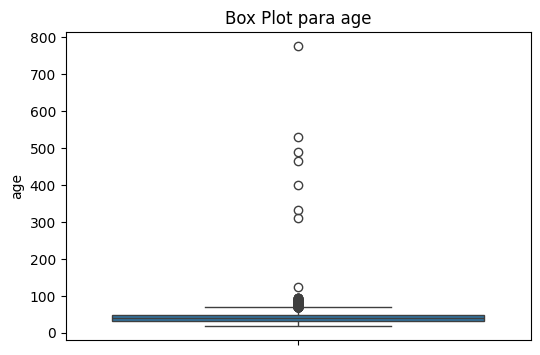

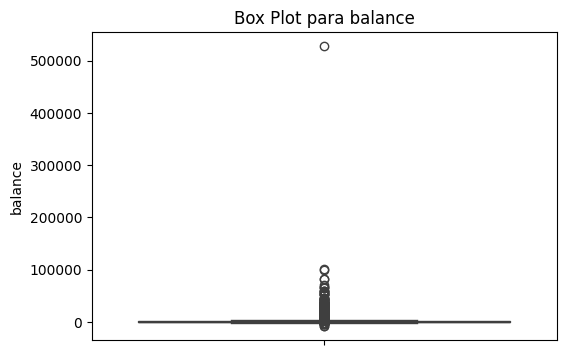

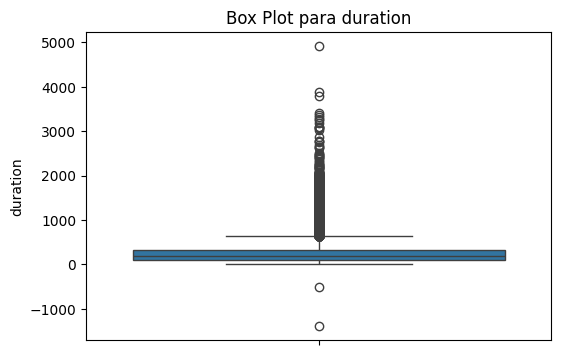

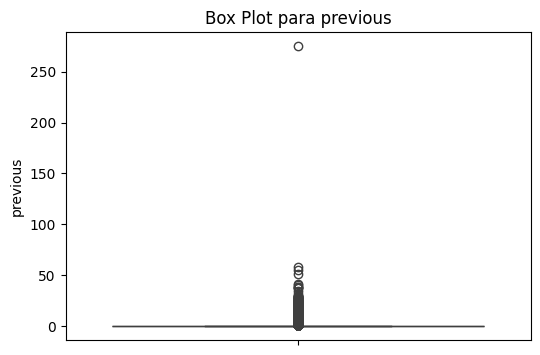

In [16]:
columns = ['age', 'balance', 'duration', 'previous']


for column in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot para {column}')
    plt.show()

#### **Observamos valores anómalos en la columna:**


edad: eliminaremos valores mayores de 100

saldo: eliminaremos el valor 500,000 y valores negativos

duración: eliminaremos valores negativos

previuos: eliminaremos el valor mas que 250

In [17]:
initial_rows = len(data)


data = data[data['age'] <= 100]

data = data[(data['balance'] >= 0) & (data['balance'] < 500000)]



data = data[data['duration'] >= 0]

data = data[data['previous'] < 250]

deleted_rows = initial_rows - len(data)


deleted_fraction = deleted_rows / initial_rows

print(f"Filas eliminadas: {deleted_rows}")
print(f"Proporción de datos eliminados: {deleted_fraction:.2%}")

Filas eliminadas: 3777
Proporción de datos eliminados: 8.36%


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [19]:
data['poutcome'] = data['poutcome'].replace('UNK', 'unknown')
data['education'] = data['education'].replace('UNK', 'unknown')
data['education'] = data['education'].replace('sec.', 'secondary')
data['contact'] = data['contact'].replace('mobile', 'cellular')
data['contact'] = data['contact'].replace('phone', 'telephone')
data['job'] = data['job'].replace('admin.', 'administrative')

data['poutcome'] = data['poutcome'].str.lower()
data['loan'] = data['loan'].str.lower()
data['education'] = data['education'].str.lower()
data['job'] = data['job'].str.lower()


print("Valores únicos en la columna 'poutcome':", data['poutcome'].unique())
print("Valores únicos en la columna 'loan':", data['loan'].unique())
print("Valores únicos en la columna 'education':", data['education'].unique())
print("Valores únicos en la columna 'job':", data['job'].unique())
print("Valores únicos en la columna 'contact':", data['contact'].unique())

Valores únicos en la columna 'poutcome': ['unknown' 'failure' 'other' 'success']
Valores únicos en la columna 'loan': ['no' 'yes']
Valores únicos en la columna 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Valores únicos en la columna 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
Valores únicos en la columna 'contact': ['unknown' 'cellular' 'telephone']


## Conclusiones

Al final del análisis, nos hemos deshecho de los valores perdidos en los datos, de los duplicados, hemos corregido los valores únicos en las columnas y también hemos eliminado los valores anómalos.

In [20]:
data.to_csv('/gdrive/MyDrive/EDEM/ML/Contenido Clasificacion/EJERCICIOS/dataset_banco_clean.csv', index=False)